In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [37]:
trace = 'memcachier100m.tr'

df = common.load_reports(common.log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 1)
    & (df.n_warmup == 20000000)
    & (df.cache_size <= 2000000)
    & (50000<= df.cache_size)
    & (df.cache_type != 'LR')
#     & (
#         (df.algorithm.isin(['SLRU', 'Belady', 'Random', 'LRU', 'BeladyLR'])) 
#         | (df.algorithm.isin(['FIFOLR', 'LRULR', 'GDSFLR', 'LFULR']))
#         | ((df.algorithm == 'LR') & (df.sample_rate == 32))
#         | ((df.algorithm == 'SLRULR') & (df.sample_rate == 32))
#     )
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

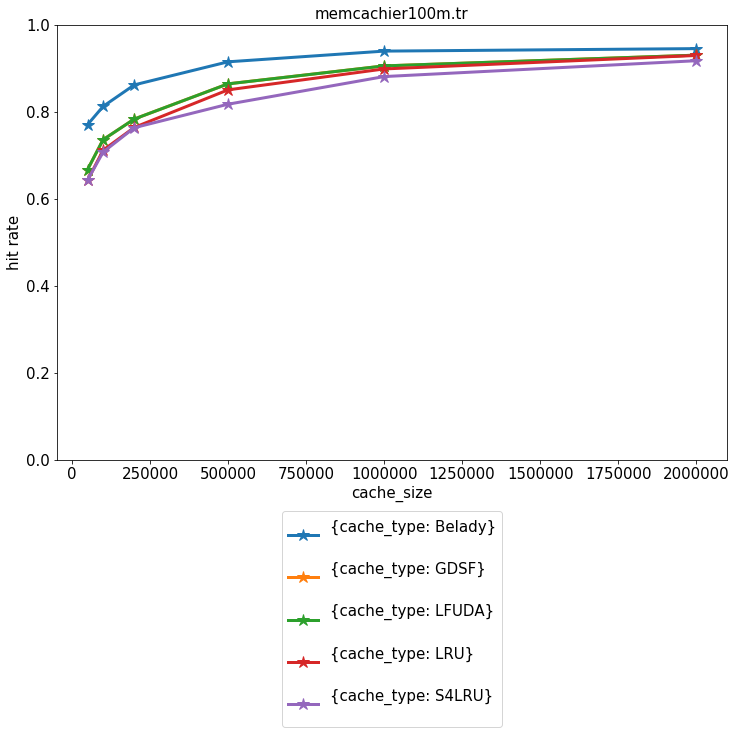

In [26]:
top = df1[['label', 'cache_size', 'byte_hit_rate']].groupby(['label']).agg({'byte_hit_rate': 'mean'}).sort_values(by='byte_hit_rate', ascending=False)[0:5].index.tolist()
df_show = df1[df1.label.isin(top)]
# df_show = df1

fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df_show.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

In [38]:
df1[['byte_hit_rate', 'cache_size', 'cache_type']].pivot(index='cache_type', columns='cache_size', values='byte_hit_rate')

cache_size,50000,100000,200000,500000,1000000,2000000
cache_type,,,,,,
Belady,0.770557,0.812616,0.862107,0.915107,0.939728,0.945451
GDSF,0.667184,0.736156,0.783614,0.864426,0.905724,0.930432
LFUDA,0.667184,0.736156,0.783614,0.864426,0.905724,0.930432
LRU,0.642244,0.711945,0.764351,0.850610,0.898714,0.929696
LRUK,0.427730,0.496331,0.561475,0.712521,0.855803,0.929515
Random,0.606457,0.670621,0.731062,0.812622,0.867390,0.907877
S4LRU,0.642982,0.707597,0.763643,0.817617,0.881183,0.917633
UCB,0.356787,0.425106,0.484693,0.600947,0.684295,0.817913


In [33]:
trace = 'memcachier100m.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 1)
    & (df.n_warmup == 20000000)
    & (df.cache_size == 500000)
    & (df.cache_type == "LR")
    & (df.version == "balance")
    #& (~ pd.isna(df.segment_byte_hit_rate))
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

In [34]:
df1.pivot(index='gradient_window', columns='learning_rate', values='byte_hit_rate').round(3)

learning_rate,1e-06,1e-05,2e-05,5e-05,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01
gradient_window,,,,,,,,,,,
1.0,0.859,0.859,0.858,0.842,0.774,0.813,0.813,0.813,0.813,0.813,0.813
2.0,0.860,0.859,0.858,0.847,0.769,0.807,0.813,0.813,0.813,0.813,0.813
5.0,0.862,0.861,0.861,0.854,0.818,0.772,0.813,0.813,0.813,0.813,0.813
10.0,0.863,0.863,0.861,0.857,0.846,0.788,0.773,0.812,0.813,0.813,0.813
20.0,0.856,0.857,0.856,0.851,0.841,0.815,0.763,0.773,0.793,0.813,0.813
50.0,0.854,0.844,0.846,0.846,0.835,0.806,0.788,0.772,0.769,0.773,0.797
100.0,0.858,0.845,0.847,0.848,0.844,0.829,0.790,0.788,0.779,0.768,0.772
200.0,0.862,0.852,0.853,0.853,0.851,0.842,0.806,0.789,0.787,0.771,0.769
500.0,0.863,0.857,0.857,0.856,0.855,0.849,0.836,0.813,0.788,0.783,0.780


In [62]:
df1[['byte_hit_rate', 'cache_size', 'cache_type']].pivot(index='cache_type', columns='cache_size', values='byte_hit_rate')

cache_size,100000000,200000000,500000000,1000000000,2000000000,5000000000,10000000000
cache_type,,,,,,,
Belady,0.736969,0.806162,0.874590,0.912224,0.940863,0.960923,0.962347
GDSF,0.466136,0.545382,0.661388,0.764268,0.831268,0.911669,0.948753
LFO,0.395237,0.502578,0.659692,0.760732,0.822553,0.889735,0.929513
LFUDA,0.613209,0.682362,0.790497,0.841701,0.891294,0.936179,0.954319
LR,0.581637,0.656547,0.752997,0.815698,0.867453,0.918095,0.943464
LRU,0.589578,0.664646,0.782874,0.845688,0.892424,0.937577,0.955269
LRUK,0.277189,0.317581,0.414798,0.475638,0.580614,0.846603,0.953896
Random,0.539380,0.623608,0.735535,0.806760,0.863662,0.916865,0.943160
S4LRU,0.588361,0.663465,0.748606,0.830589,0.877315,0.928560,0.949384


In [29]:
trace = 'memcachier0app100m.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 1)
    & (df.n_warmup == 20000000)
    & (df.cache_size <= 200000)
    & (2000<= df.cache_size)
#     & (
#         (df.algorithm.isin(['SLRU', 'Belady', 'Random', 'LRU', 'BeladyLR'])) 
#         | (df.algorithm.isin(['FIFOLR', 'LRULR', 'GDSFLR', 'LFULR']))
#         | ((df.algorithm == 'LR') & (df.sample_rate == 32))
#         | ((df.algorithm == 'SLRULR') & (df.sample_rate == 32))
#     )
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

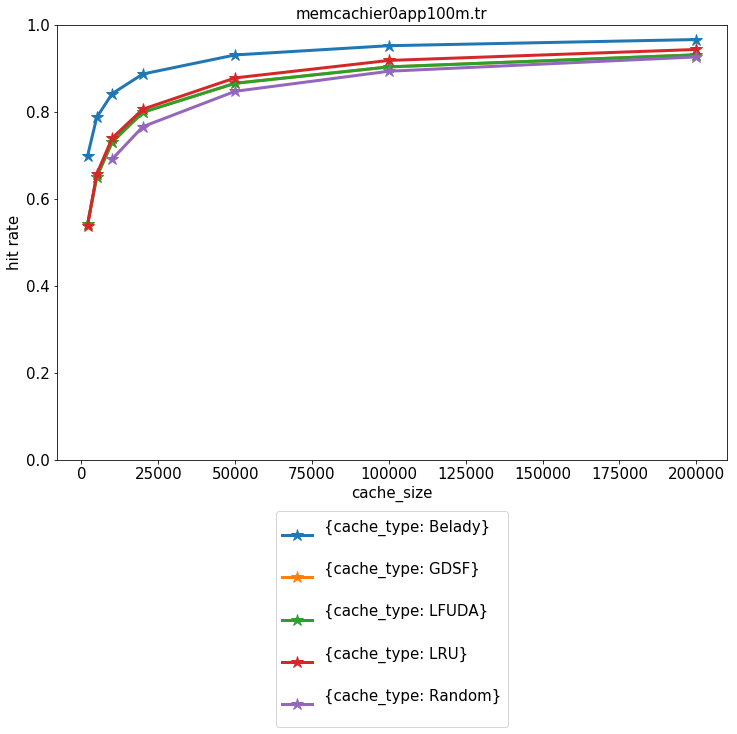

In [30]:
top = df1[['label', 'cache_size', 'byte_hit_rate']].groupby(['label']).agg({'byte_hit_rate': 'mean'}).sort_values(by='byte_hit_rate', ascending=False)[0:5].index.tolist()
df_show = df1[df1.label.isin(top)]
# df_show = df1

fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df_show.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

In [32]:
df1.pivot(index='cache_type', columns='cache_size', values='byte_hit_rate').round(3)

cache_size,2000,5000,10000,20000,50000,100000,200000
cache_type,,,,,,,
Belady,0.698,0.787,0.842,0.887,0.931,0.952,0.966
GDSF,0.541,0.651,0.730,0.799,0.866,0.903,0.931
LFUDA,0.541,0.651,0.730,0.799,0.866,0.903,0.931
LRU,0.538,0.657,0.740,0.806,0.878,0.918,0.943
LRUK,0.100,0.111,0.121,0.129,0.145,0.162,0.191
Random,NaN,NaN,0.691,0.766,0.847,0.893,0.926
S4LRU,0.521,0.645,0.727,0.794,0.865,0.907,0.937
UCB,0.091,0.104,0.118,0.130,0.148,0.161,0.173


# Vari cache size

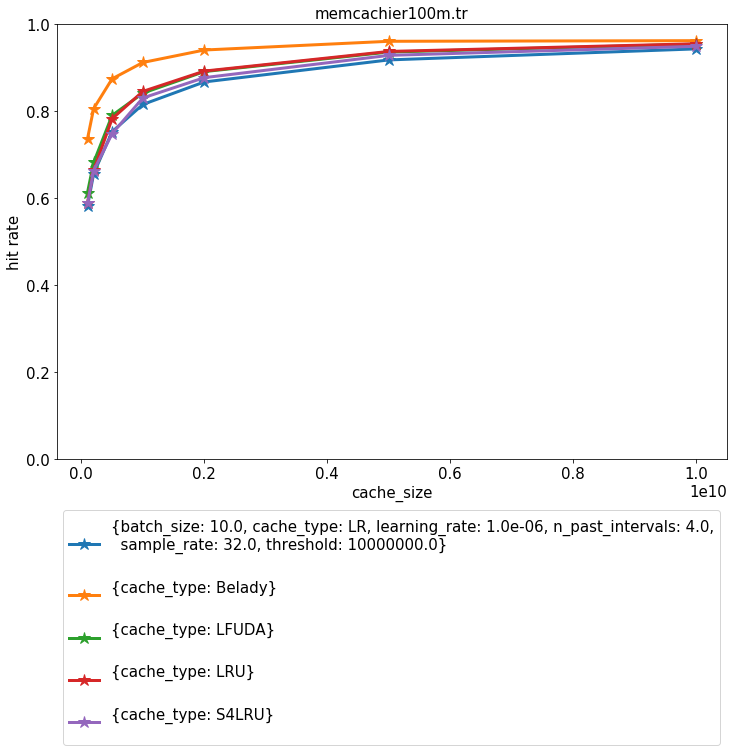

In [96]:
fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df_show.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

In [28]:
df1.pivot(index='cache_type', columns='cache_size', values='byte_hit_rate').round(3)

cache_size,50000,100000,200000,500000,1000000,2000000
cache_type,,,,,,
Belady,0.771,0.813,0.862,0.915,0.940,0.945
GDSF,0.667,0.736,0.784,0.864,0.906,0.930
LFUDA,0.667,0.736,0.784,0.864,0.906,0.930
LRU,0.642,0.712,0.764,0.851,0.899,0.930
LRUK,0.428,0.496,0.561,0.713,0.856,0.930
Random,0.606,0.671,0.731,0.813,0.867,0.908
S4LRU,0.643,0.708,0.764,0.818,0.881,0.918
UCB,0.357,0.425,0.485,0.601,0.684,0.818


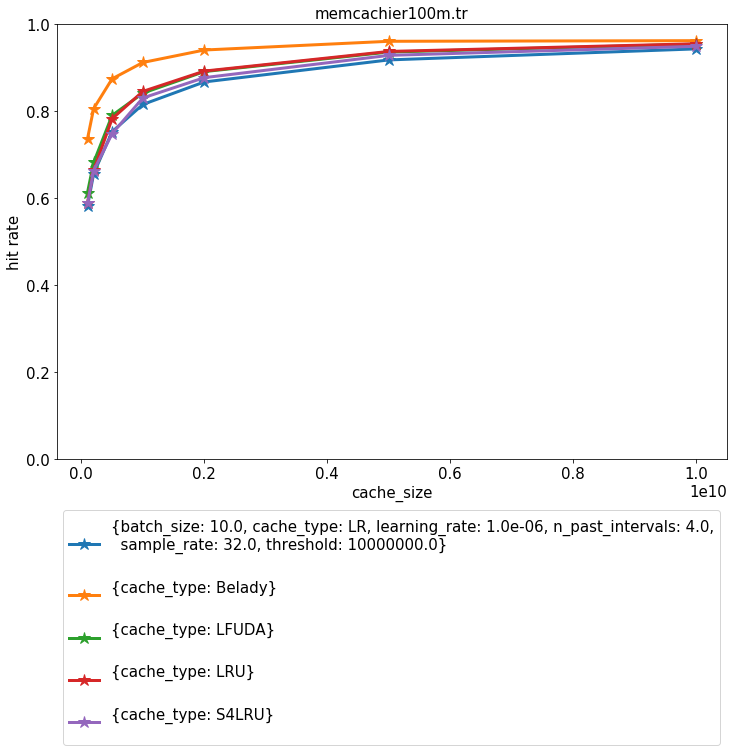

In [96]:
fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df_show.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

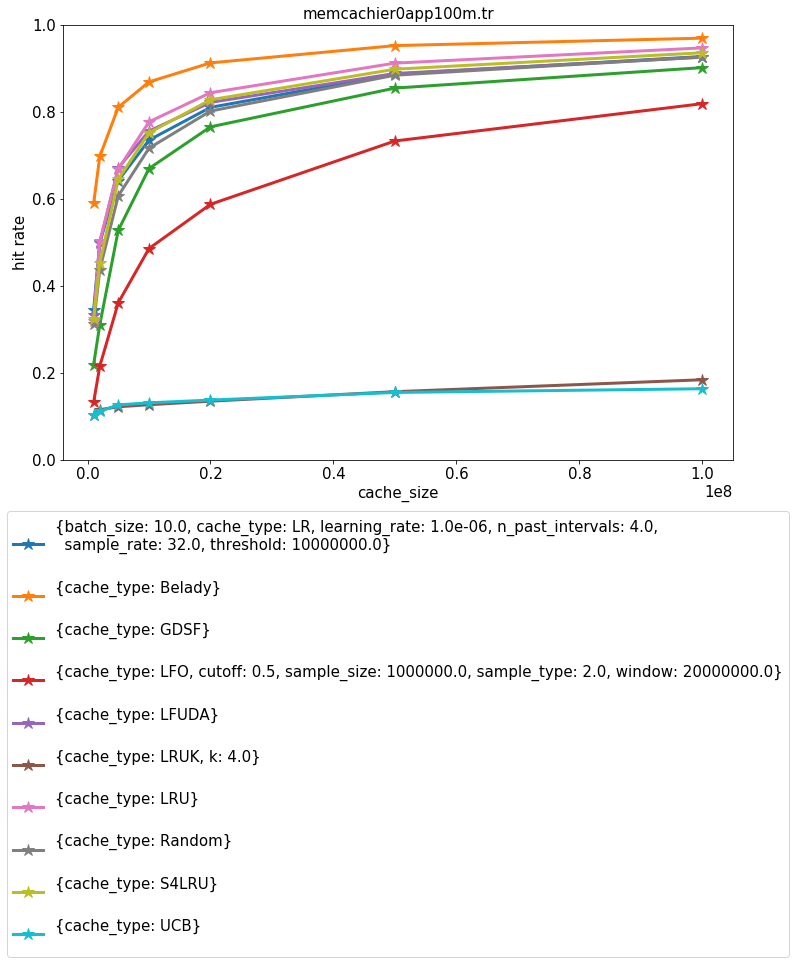

In [63]:
trace = 'memcachier0app100m.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
#     & (1000000 <= df.cache_size)
#     & (df.cache_size <= 100000000)
    & ((df.cache_type != "LFO") | (df.sample_size == 1000000))
    & (df.n_warmup == 20000000)
#     & (df.n_warmup == 100000)
#     & (df.if_uni_size == False)
#     & (df.cache_capacity <= 30000)
#     & (
#         (df.algorithm.isin(['SLRU', 'Belady', 'Random', 'LRU', 'BeladyLR'])) 
#         | (df.algorithm.isin(['FIFOLR', 'LRULR', 'GDSFLR', 'LFULR']))
#         | ((df.algorithm == 'LR') & (df.sample_rate == 32))
#         | ((df.algorithm == 'SLRULR') & (df.sample_rate == 32))
#     )
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')
fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df1.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

In [64]:
df1[['byte_hit_rate', 'cache_size', 'cache_type']].pivot(index='cache_type', columns='cache_size', values='byte_hit_rate')

cache_size,1000000,2000000,5000000,10000000,20000000,50000000,100000000
cache_type,,,,,,,
Belady,0.589500,0.697257,0.810187,0.868597,0.912342,0.952094,0.969220
GDSF,0.218767,0.310392,0.527183,0.669373,0.765299,0.854383,0.901458
LFO,0.132132,0.214872,0.360570,0.485407,0.587161,0.732799,0.818593
LFUDA,0.331474,0.497517,0.670814,0.755510,0.821494,0.887941,0.925294
LR,0.344757,0.499575,0.641607,0.734731,0.810102,0.886501,0.927029
LRU,0.319090,0.502657,0.668103,0.776710,0.843780,0.911764,0.946817
LRUK,0.102640,0.114904,0.121555,0.126308,0.134450,0.156276,0.183719
Random,0.312300,0.437013,0.606482,0.716173,0.801585,0.884045,0.926062
S4LRU,0.322953,0.452682,0.644483,0.751519,0.827492,0.897825,0.935634
